We can also use .pkl file data as datasets

# Imports

In [1]:
from training import *
from environment import Environment
import yfinance as yf
import pandas as pd
from stable_baselines3 import A2C, DDPG, DQN, PPO, SAC, TD3
import itertools
from tqdm import tqdm

# Examples

In [4]:
data  = read_stock_file("Data/indtrack8.txt")
data

,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5,Stock_6,Stock_7,Stock_8,Stock_9,Stock_10,...,Stock_2144,Stock_2145,Stock_2146,Stock_2147,Stock_2148,Stock_2149,Stock_2150,Stock_2151,Stock_2152,Stock_2153
0,750.04,21.50,2.22,19.83,14.00,26.31,11.83,11.19,7.13,8.19,...,1.75,10.83,19.37,15.13,15.54,10.25,79.75,12.75,14.22,2.36
1,757.07,23.25,2.22,18.58,14.13,26.25,12.00,11.13,7.00,8.69,...,1.84,12.17,19.25,14.88,15.82,10.13,80.63,12.75,14.84,2.54
2,767.71,20.00,2.44,18.33,14.50,26.94,12.17,9.81,6.75,8.56,...,1.59,14.50,19.25,15.50,16.35,10.13,82.88,14.25,13.91,2.52
3,779.05,21.25,2.28,19.83,14.50,27.88,11.33,9.19,6.63,8.56,...,1.63,14.33,19.87,14.88,16.71,9.75,83.38,16.50,13.28,2.62
4,772.58,20.25,2.17,19.83,14.50,26.63,11.50,9.75,6.38,8.44,...,1.72,14.00,23.94,14.88,17.01,11.75,82.75,16.50,13.75,2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1117.94,28.57,20.90,12.60,27.95,55.00,15.60,30.12,7.10,19.18,...,5.82,22.90,16.56,20.95,6.00,13.80,126.00,18.20,9.16,31.25
287,1119.47,26.20,19.63,12.28,28.10,52.40,14.50,33.00,7.61,18.48,...,5.85,24.41,15.72,21.50,5.90,14.90,126.18,17.48,8.70,32.03
288,1123.19,22.05,20.43,12.47,28.35,46.90,14.00,31.52,7.10,18.85,...,5.10,26.27,15.69,21.51,6.07,13.75,129.50,17.11,8.87,31.74
289,1112.82,20.19,19.74,12.00,26.00,47.60,14.50,28.36,7.30,17.85,...,4.78,23.80,14.73,21.28,5.89,12.80,127.54,16.43,8.70,30.72


Key policy not in dict. Using default value MlpPolicy. - Key device not in dict. Using default value cuda:0. - Key seed not in dict. Using default value 5.
Key window_size not in dict. Using default value -1.
Key seed not in dict. Using default value 5. - Key subsample not in dict. Using default value -1.


Output()

Training time: 633.673 seconds.


100%|██████████| 566/566 [01:20<00:00,  7.06it/s]


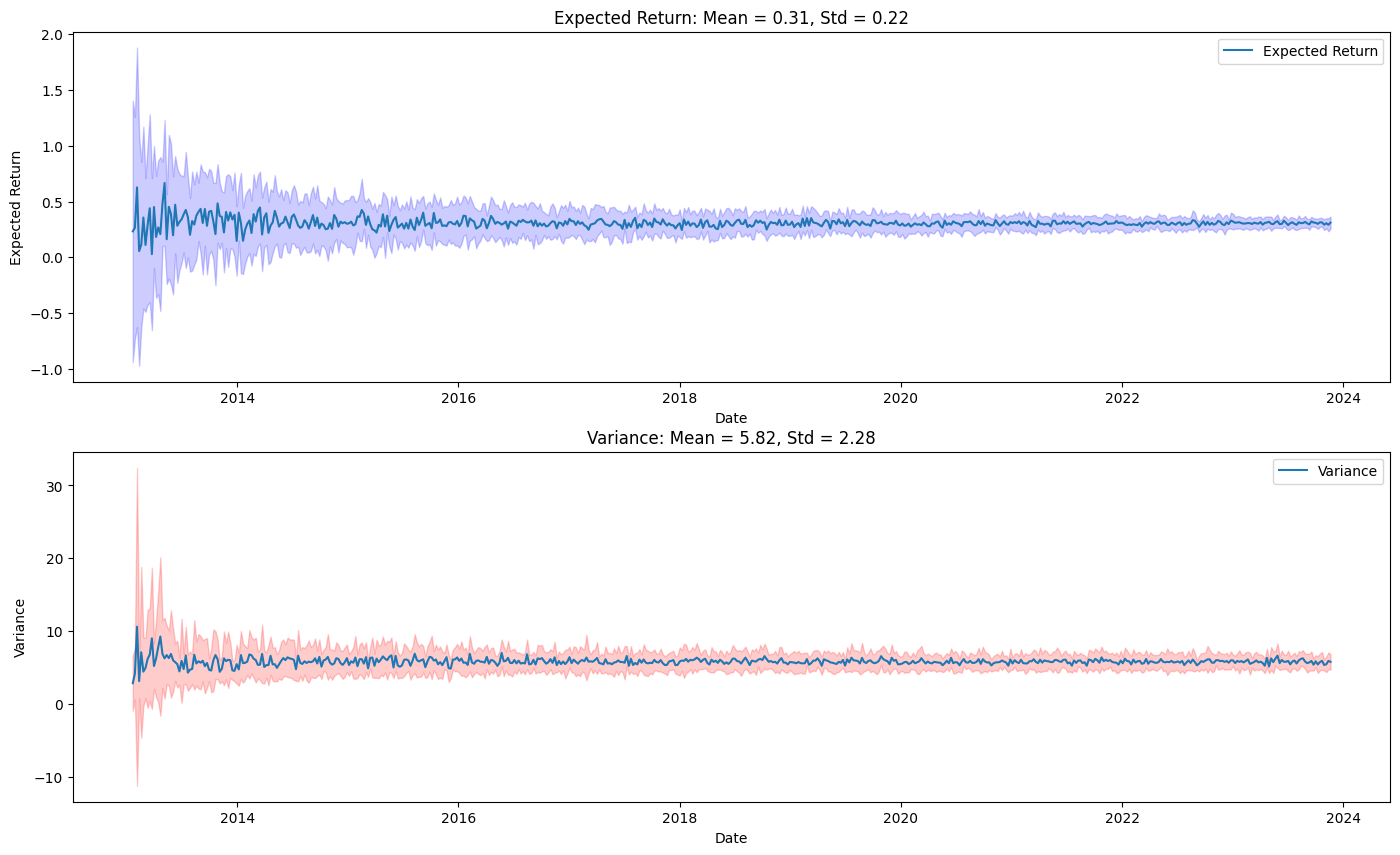

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  -2.7316
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.1082 0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.0977 0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.1072 0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.  

In [2]:
data = pd.read_pickle("data/subset_weekly_closings_10yrs.pkl")
data = data.pct_change().iloc[1:, :] * 100

vector_dict={"vector_size": 20, "shuffle": True}
model_dict={"model_name": A2C}
env_dict={"data": data, "sigma": 0.5, "random_nn": True, "random_data": True, "cardinality_constraint": 10, "cardinality_constraint_mode": "renormalize", "lambda_regularization": 1.0, "shrinkage": False}
policy_dict={"net_arch":[16, 16]}
training_dict={"max_iteration": 5, "n_timesteps": 40000, "model_save": f"Models/{model_dict['model_name'].__name__}_{env_dict['sigma']}_{env_dict['cardinality_constraint']}_{env_dict['cardinality_constraint_mode']}_{env_dict['lambda_regularization']}_{'_'.join(str(x) for x in policy_dict['net_arch'])}_{vector_dict['vector_size']}.zip"}
xlsx_name = "examples.xlsx-subsetpkl"

SSP_MV_vect(vector_dict= vector_dict, model_dict= model_dict, training_dict= training_dict, env_dict= env_dict, policy_dict= policy_dict, xlsx_name= xlsx_name)


In [4]:
print_gurobi(env_dict["data"], env_dict["sigma"], None, env_dict["cardinality_constraint"], None, True, True)

For this dataset, Gurobi couldn't find the optimal solution in 30 min. Still, it found an almost optimal solution (Optimal value at -0.88362 and Gap at 0.9%).

In [3]:
sum = 0
for i in range(0, 1000):
    random_w = random_weights(env_dict["cardinality_constraint"], env_dict["data"].shape[1], seed=i)
    mu, sigma = get_mu_sigma(env_dict["data"])
    random_optimal_value = env_dict["sigma"] * mu @ random_w - (1-env_dict["sigma"]) * random_w @ sigma @ random_w
    sum += random_optimal_value
print("The Objective Value obtained when using a random vector x as weights is: ", sum/1000)

The Objective Value obtained when using a random vector x as weights is:  -16.84963056302556


We can compute a relative gap with respect to random weights, such as $\frac{|Gurobi_{value} - DRL_{value}|}{|Gurobi_{value} - random_{value}|}$.
Here, we get 11.57%.

In [4]:
print_gurobi(env_dict["data"], 0.05, None, env_dict["cardinality_constraint"], None, True, True)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2539734
Academic license 2539734 - for non-commercial use only - registered to vi___@ensiie.eu
Set parameter TimeLimit to value 1800
Set parameter Threads to value 1
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 11.0 (22631.2))

CPU model: AMD Ryzen 5 5600 6-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 1 threads

Academic license 2539734 - for non-commercial use only - registered to vi___@ensiie.eu
Optimize a model with 926 rows, 924 columns and 2772 nonzeros
Model fingerprint: 0x3dc00861
Model has 106953 quadratic objective terms
Variable types: 462 continuous, 462 integer (462 binary)
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [4e-05, 6e-02]
  QObjective range [5e-03, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective -11

We can also see that for small value of sigma (0.05), the computing time is also very long.